# 30 Day Map Challenge

## Day 2 - Lines

Plan: Plot the walking paths around the City of London in an artistic way

Setting up the notebook:

In [64]:
import osmnx as ox
import matplotlib

%matplotlib inline


Selecting the area and extracting walking paths

In [65]:
Walk = ox.graph_from_bbox(51.5206,51.5040,-0.0996,-0.0666,retain_all=True, truncate_by_edge=True,
                        simplify=False, network_type='walk')

Unpacking the osmnx data

In [66]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Walk.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    

Defining colours based on length of the path

In [67]:
# List to store colors
laneColors = []

# The length is in meters
for item in data:
    if "length" in item.keys():
        if item["length"] <= 25:
            color = "#ff00ae"   
        elif item["length"] > 25 and item["length"] <= 50:
            color = "#b300ff"
        elif item["length"] > 50 and item["length"] <= 100:
            color = "#6f00ff"
        elif item["length"] > 100 and item["length"] <= 150:
            color = "#3300ff"
        else:
            color = "#3300ff"
             
    laneColors.append(color)

Building the map

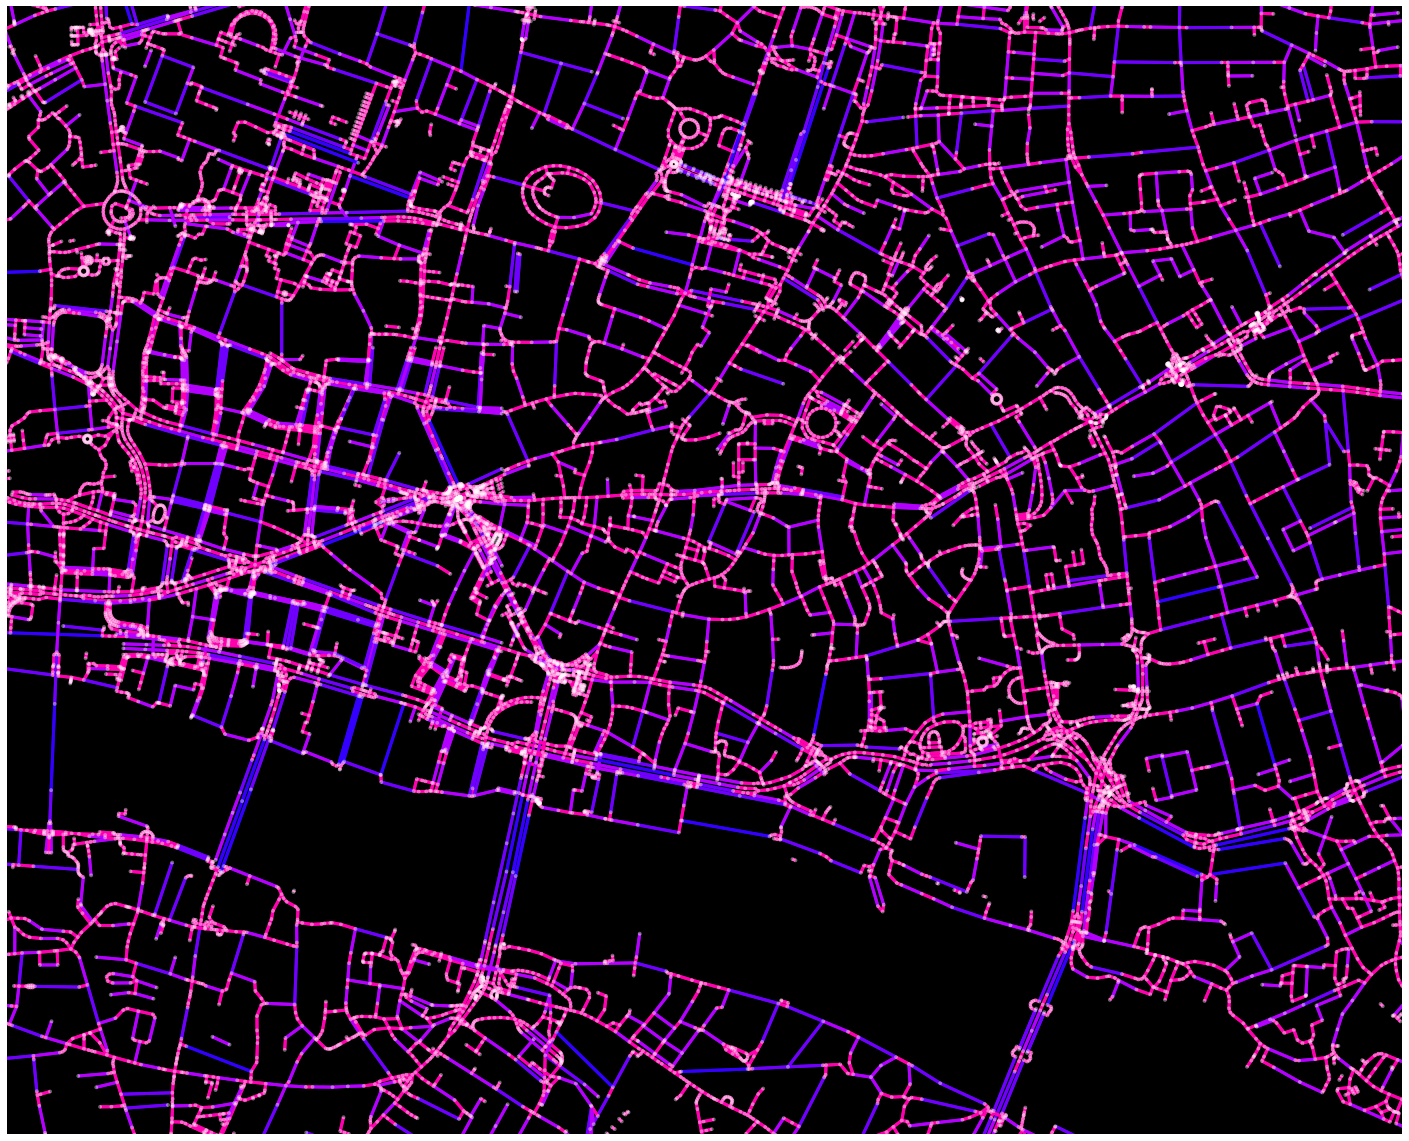

In [75]:
fig, ax = ox.plot_graph(Walk, 
                        node_size=15, node_alpha=0.4, 
                        # node_color="#3600FF", 
                        bbox = (51.5206,51.5040,-0.0666,-0.0996), 
                        dpi = 500,  
                        bgcolor = "#000000", 
                        figsize=(25,25), 
                        save = False, 
                        edge_color=laneColors,
                        edge_linewidth=3, 
                        edge_alpha=1)